In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
%matplotlib inline

In [4]:
df= pd.read_csv('T1.csv')

In [5]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])
df=df.set_index("Date/Time")

In [7]:
df["Year"]=df.index.year
df["Month"]=df.index.month
df["Weekday"]=df.index.weekday

In [8]:
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0


In [9]:
df_=df.copy()

In [10]:
df_.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0


In [15]:
X_=df_[["Wind Speed (m/s)","Wind Direction (°)","Month"]]
y_=df_["LV ActivePower (kW)"]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
scaler_.fit(X_)
scaled_features_ = scaler_.transform(X_)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features_,y_,
                                                    test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestRegressor
lm_ = RandomForestRegressor(n_estimators=500)
lm_.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

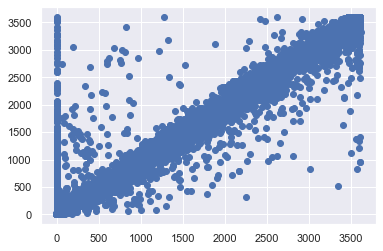

In [20]:
predictions_ = lm_.predict(X_test)
plt.scatter(y_test,predictions_)

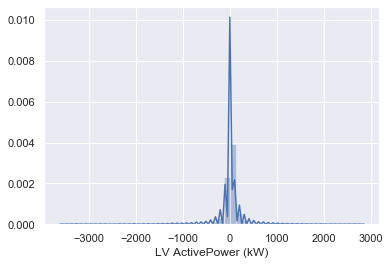

In [21]:
sns.distplot((y_test-predictions_),bins=50);

In [22]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_))
print('MSE:', metrics.mean_squared_error(y_test, predictions_))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_)))

MAE: 115.73759830958949
MSE: 97349.47156021946
RMSE: 312.00876840277976


In [23]:
import joblib
filename = 'Wind Turbine(LV).sav'
joblib.dump(lm_, filename)

['Wind Turbine(LV).sav']